In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Conv2D, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Model
import pandas as pd

In [21]:
#Dataset Preparation

# Read dataset 
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display the shape of the training and testing datasets
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)


#Normalize the predictors  
X_train = X_train / 255
X_test = X_test/255

#Reshape the inputs
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

Training set: (60000, 28, 28) (60000,)
Testing set: (10000, 28, 28) (10000,)


## AE Architecture

![AE Network Diagram.png](<attachment:AE Network Diagram.png>)
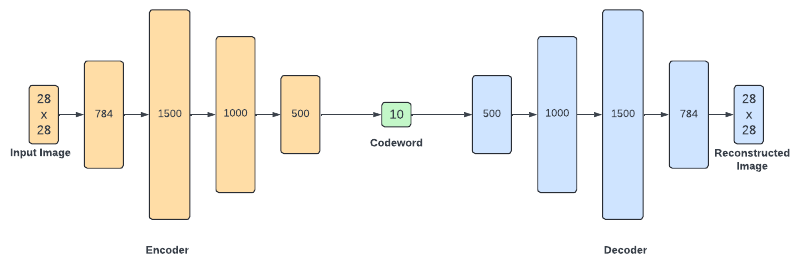

In [22]:
#AutoEncoder Network

#Input Layer
input_layer = Input(shape=(784,))

#Encoder
encoder_layer1 = Dense(1500,activation='relu')(input_layer)
encoder_layer2 = Dense(1000,activation='relu')(encoder_layer1)
encoder_layer3 = Dense(500,activation='relu')(encoder_layer2)

#Latent Representation/Codeword/Bottleneck
latent_view = Dense(10,activation='relu')(encoder_layer3)

#Decoder
decoder_layer1 = Dense(500,activation='relu')(latent_view)
decoder_layer2 = Dense(1000,activation='relu')(decoder_layer1)
decoder_layer3 = Dense(1500,activation='relu')(decoder_layer2)

#Output Layer
output_layer = Dense(784)(decoder_layer3)

model = Model(input_layer,output_layer)

In [23]:
#Model Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     1,177,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     1,501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │         5,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1000)           │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │     1,501,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │     1,176,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,368,794 (24.30 MB)

 Trainable params: 6,368,794 (24.30 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#Training model
model.compile(optimizer='adam',loss='mse')
early_stopping = EarlyStopping(monitor = 'val_loss',min_delta=0,patience=10,verbose=1,mode='auto')
history = model.fit(X_train,X_train,epochs=20,batch_size=1500,validation_data=(X_test,X_test),callbacks=[early_stopping])

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - loss: 0.0337 - val_loss: 0.0210
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - loss: 0.0201 - val_loss: 0.0193
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - loss: 0.0190 - val_loss: 0.0190
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - loss: 0.0187 - val_loss: 0.0189
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - loss: 0.0184 - val_loss: 0.0184
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - loss: 0.0181 - val_loss: 0.0182
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - loss: 0.0180 - val_loss: 0.0182
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 0.0178 - val_loss: 0.0178
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - loss: 0.0177 - val_loss: 0.0178
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - loss: 0.0174 - val_loss: 0.0178
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - loss: 0.0174 - val_loss: 0.0175
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step

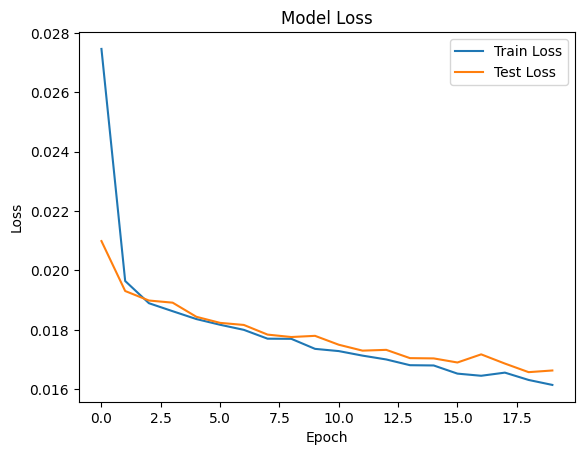

In [29]:
# Plotting the training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.show()


In [30]:
#Prediction

prediction = model.predict(X_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[-0.00022271, -0.00072688, -0.00304385, ...,  0.00454534,
        -0.00225326, -0.00175077],
       [ 0.00310018,  0.00305113, -0.0022944 , ..., -0.0040748 ,
        -0.00139411, -0.00133403],
       [-0.01634509,  0.01672758, -0.01457291, ...,  0.0117437 ,
        -0.0059005 ,  0.01182533],
       ...,
       [ 0.01490074, -0.00460571, -0.00153279, ..., -0.0204949 ,
         0.0104984 ,  0.00985931],
       [-0.00623358,  0.00543712, -0.00319763, ...,  0.0063995 ,
        -0.0054544 ,  0.00262527],
       [ 0.01009257, -0.00638328, -0.00121537, ..., -0.00193465,
        -0.00217461,  0.0009763 ]], dtype=float32)

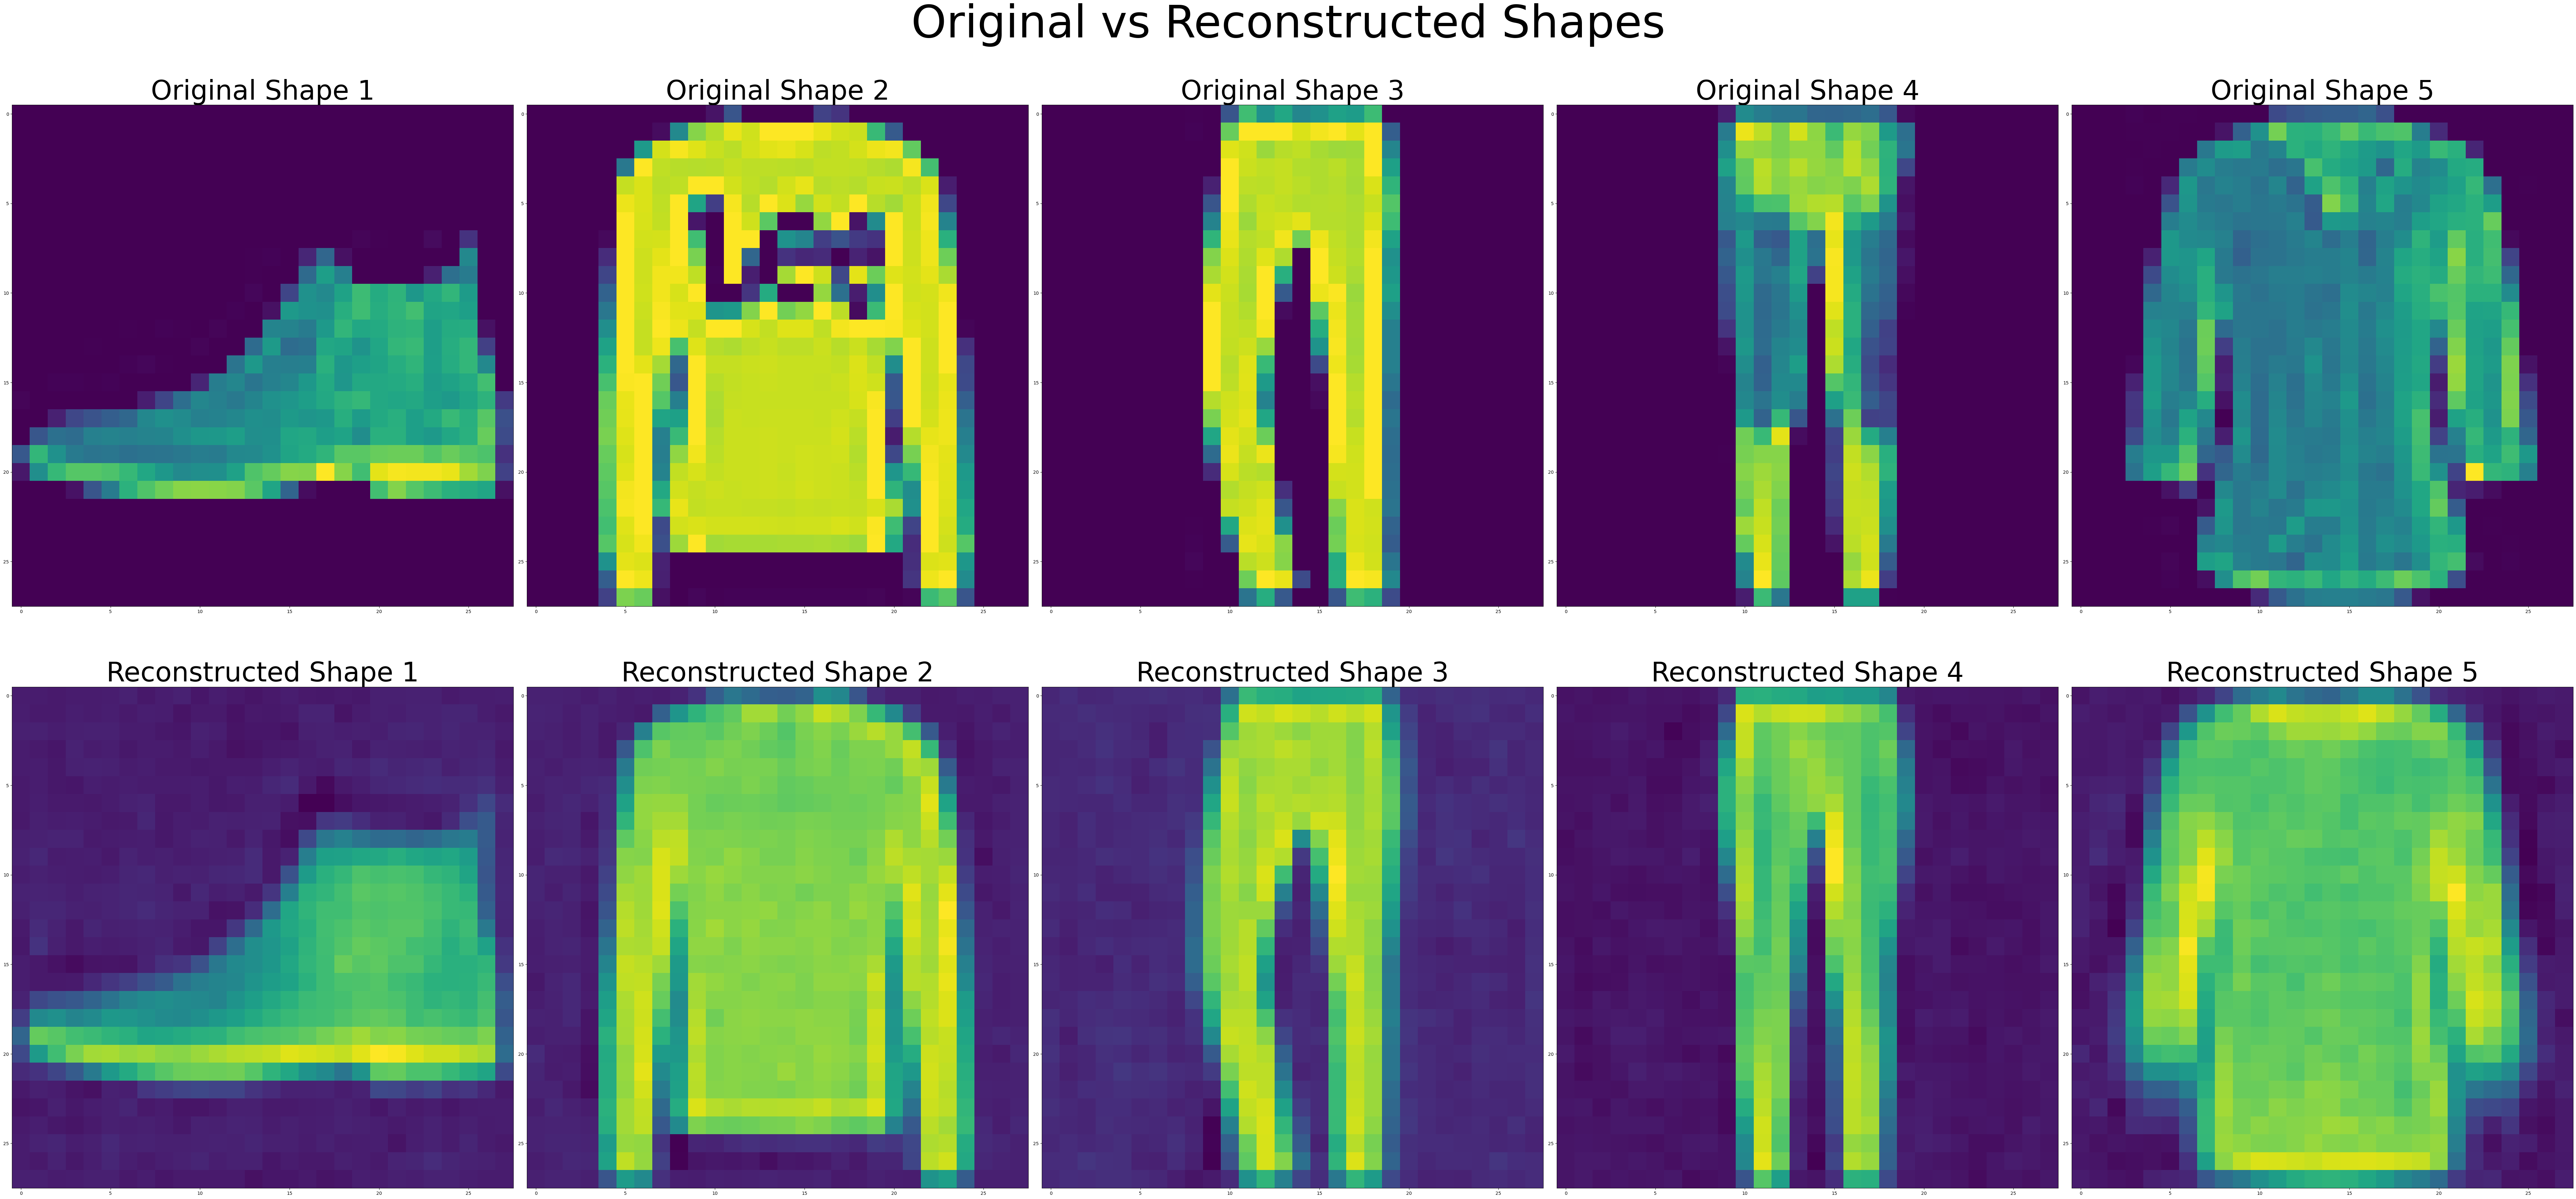

In [48]:
#Compare the original and predicted image
from PIL import Image

fig,ax = plt.subplots(2,5)
fig.set_size_inches(80,40)
fig.suptitle('Original vs Reconstructed Shapes',fontsize=100)

for i in range(5):
    ax[0,i].imshow(X_test[i].reshape(28,28))
    ax[0,i].set_title(f'Original Shape {i+1}',fontsize=60)

    ax[1,i].imshow(prediction[i].reshape(28,28))
    ax[1,i].set_title(f'Reconstructed Shape {i+1}',fontsize=60)

plt.tight_layout()
plt.show()